# TP3 - Exercise 5: Jacobi Method Parallelization

Analysis of parallel Jacobi iterative method performance using OpenMP.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Load Results

In [2]:
# Load data
df = pd.read_csv('results.csv')
print("Raw Results:")
print(df)
print(f"\nSerial time (1 thread): {df.loc[0, 'time']:.6f} seconds")

Raw Results:
   threads      time
0        1  0.239073
1        2  0.118172
2        4  0.066146
3        8  0.040877
4       16  0.256779

Serial time (1 thread): 0.239073 seconds


## Calculate Performance Metrics

In [3]:
# Get serial baseline
T_serial = df.loc[0, 'time']

# Calculate speedup and efficiency
df['speedup'] = T_serial / df['time']
df['efficiency'] = (df['speedup'] / df['threads']) * 100
df['ideal_speedup'] = df['threads']

print("\nPerformance Metrics:")
print(df[['threads', 'time', 'speedup', 'efficiency']].to_string(index=False))


Performance Metrics:
 threads     time  speedup  efficiency
       1 0.239073 1.000000  100.000000
       2 0.118172 2.023093  101.154673
       4 0.066146 3.614323   90.358072
       8 0.040877 5.848595   73.107432
      16 0.256779 0.931046    5.819036


## Plot 1: Execution Time vs Threads

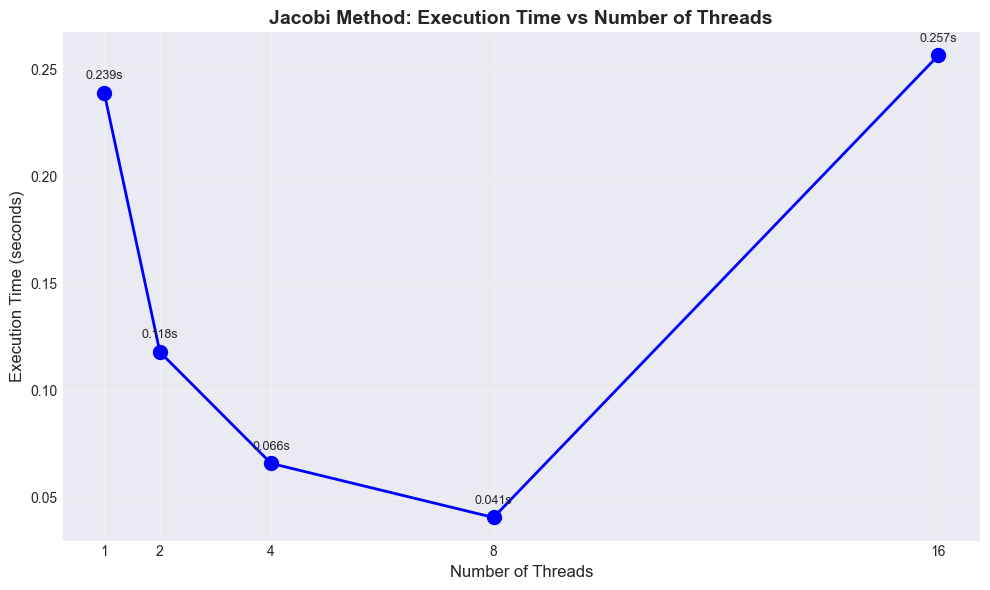

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['threads'], df['time'], 
        marker='o', linewidth=2, markersize=10, 
        color='blue', label='Execution Time')

ax.set_xlabel('Number of Threads', fontsize=12)
ax.set_ylabel('Execution Time (seconds)', fontsize=12)
ax.set_title('Jacobi Method: Execution Time vs Number of Threads', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks(df['threads'])

# Annotate values
for i, row in df.iterrows():
    ax.annotate(f"{row['time']:.3f}s", 
                (row['threads'], row['time']),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center',
                fontsize=9)

plt.tight_layout()
plt.savefig('jacobi_time.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot 2: Speedup Analysis

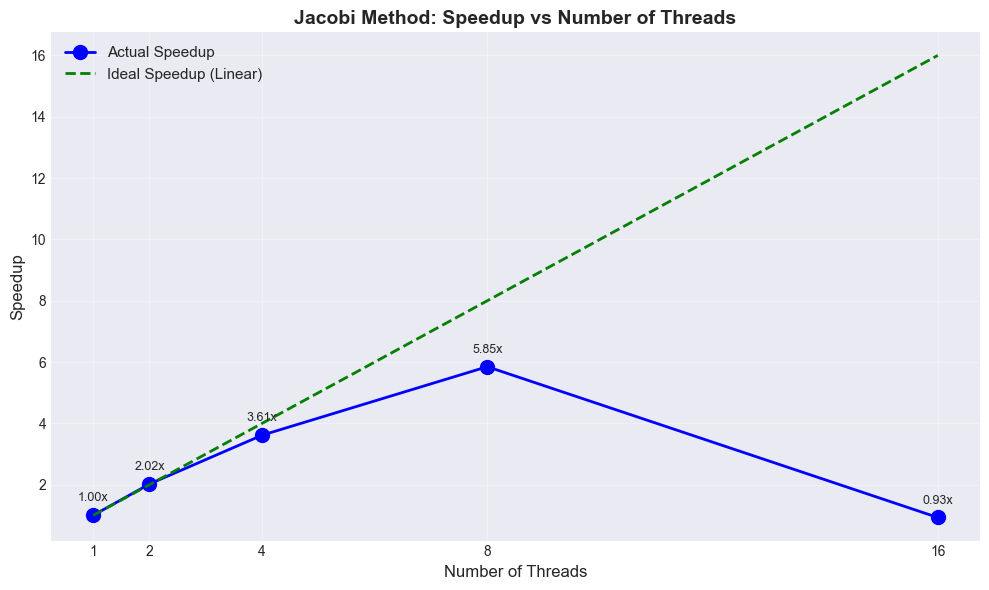


Maximum speedup: 5.85x with 8 threads


In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

# Actual speedup
ax.plot(df['threads'], df['speedup'], 
        marker='o', linewidth=2, markersize=10, 
        color='blue', label='Actual Speedup')

# Ideal speedup
ax.plot(df['threads'], df['ideal_speedup'], 
        linestyle='--', linewidth=2, 
        color='green', label='Ideal Speedup (Linear)')

ax.set_xlabel('Number of Threads', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)
ax.set_title('Jacobi Method: Speedup vs Number of Threads', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(df['threads'])

# Annotate values
for i, row in df.iterrows():
    ax.annotate(f"{row['speedup']:.2f}x", 
                (row['threads'], row['speedup']),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center',
                fontsize=9)

plt.tight_layout()
plt.savefig('jacobi_speedup.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nMaximum speedup: {df['speedup'].max():.2f}x with {df.loc[df['speedup'].idxmax(), 'threads']:.0f} threads")

## Plot 3: Parallel Efficiency

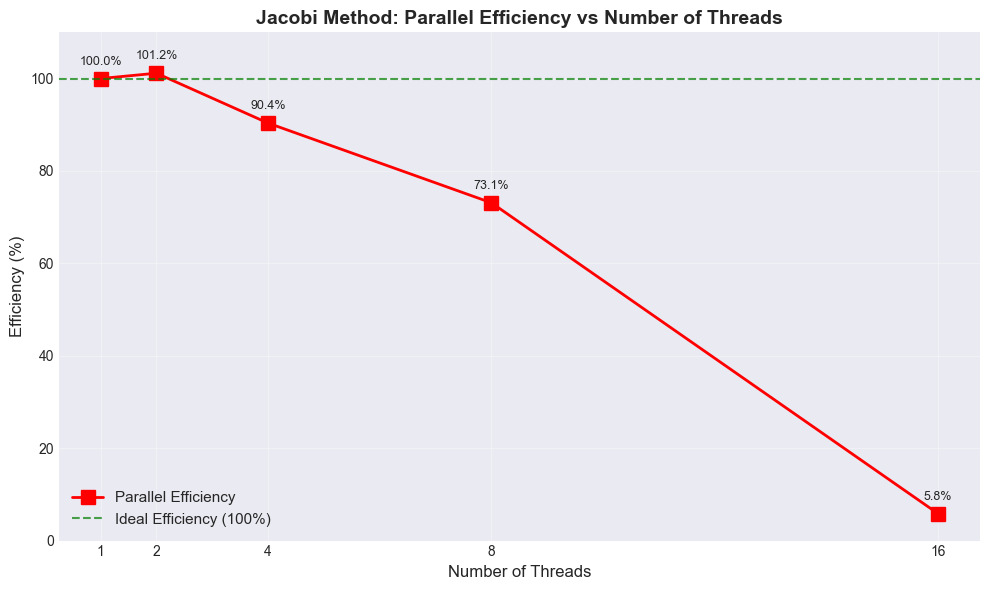

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['threads'], df['efficiency'], 
        marker='s', linewidth=2, markersize=10, 
        color='red', label='Parallel Efficiency')

# 100% efficiency line
ax.axhline(y=100, linestyle='--', linewidth=1.5, 
           color='green', label='Ideal Efficiency (100%)', alpha=0.7)

ax.set_xlabel('Number of Threads', fontsize=12)
ax.set_ylabel('Efficiency (%)', fontsize=12)
ax.set_title('Jacobi Method: Parallel Efficiency vs Number of Threads', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(df['threads'])
ax.set_ylim(0, 110)

# Annotate values
for i, row in df.iterrows():
    ax.annotate(f"{row['efficiency']:.1f}%", 
                (row['threads'], row['efficiency']),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center',
                fontsize=9)

plt.tight_layout()
plt.savefig('jacobi_efficiency.png', dpi=300, bbox_inches='tight')
plt.show()

## Combined Analysis Dashboard

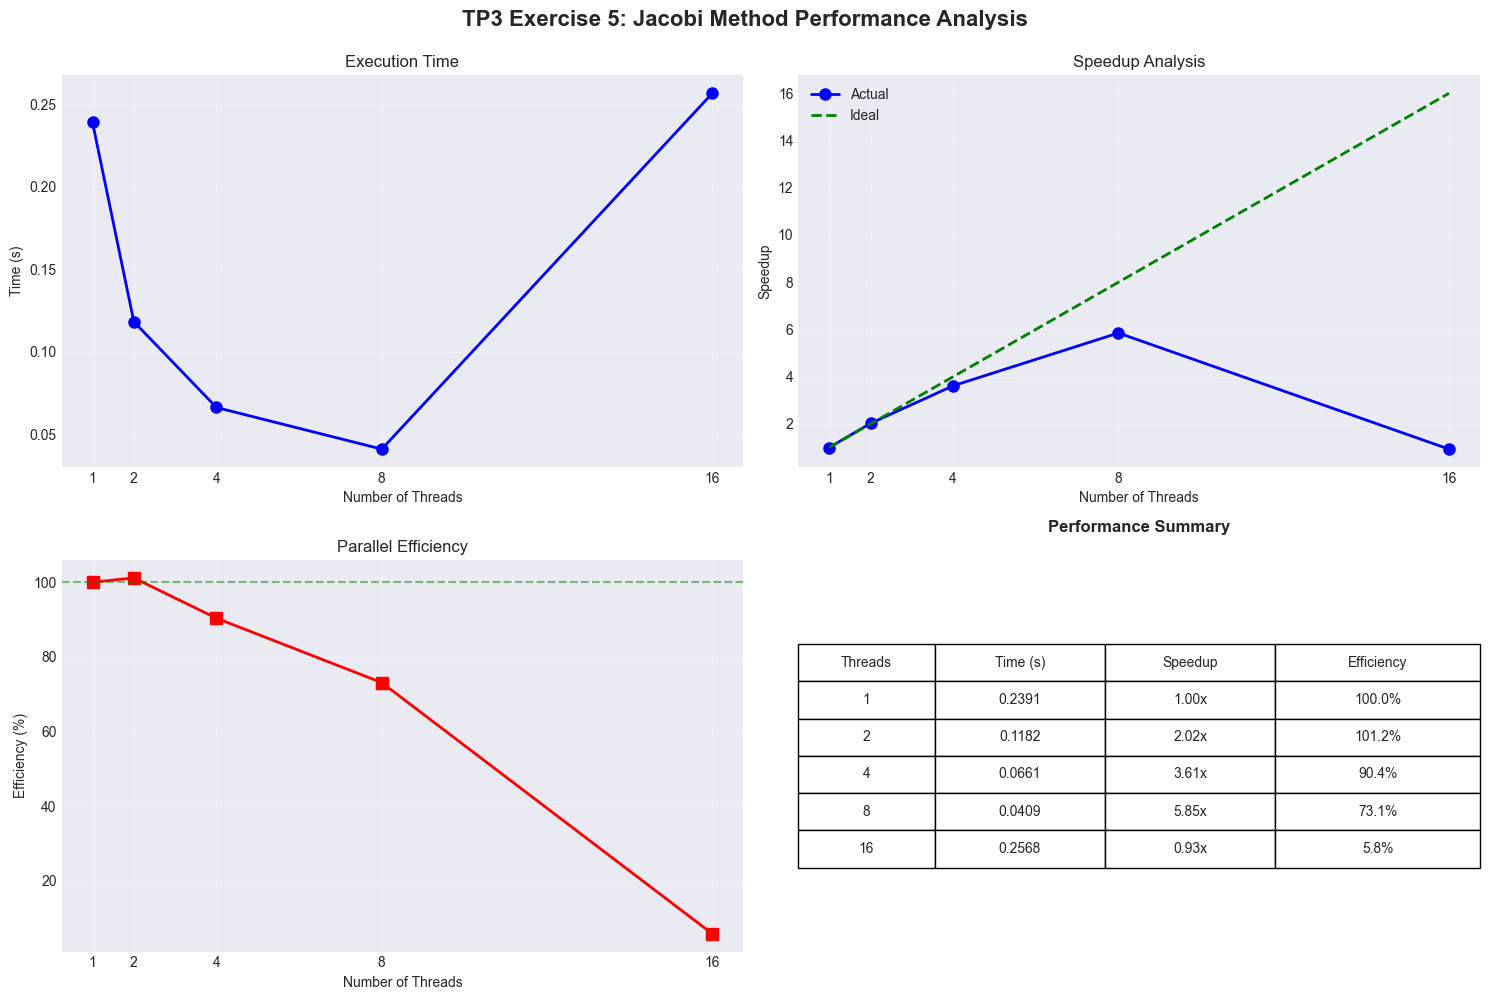

In [7]:
fig = plt.figure(figsize=(15, 10))

# Plot 1: Execution Time
ax1 = plt.subplot(2, 2, 1)
ax1.plot(df['threads'], df['time'], marker='o', linewidth=2, markersize=8, color='blue')
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Time (s)')
ax1.set_title('Execution Time')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(df['threads'])

# Plot 2: Speedup
ax2 = plt.subplot(2, 2, 2)
ax2.plot(df['threads'], df['speedup'], marker='o', linewidth=2, markersize=8, 
         color='blue', label='Actual')
ax2.plot(df['threads'], df['ideal_speedup'], linestyle='--', linewidth=2, 
         color='green', label='Ideal')
ax2.set_xlabel('Number of Threads')
ax2.set_ylabel('Speedup')
ax2.set_title('Speedup Analysis')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(df['threads'])

# Plot 3: Efficiency
ax3 = plt.subplot(2, 2, 3)
ax3.plot(df['threads'], df['efficiency'], marker='s', linewidth=2, markersize=8, color='red')
ax3.axhline(y=100, linestyle='--', color='green', alpha=0.5)
ax3.set_xlabel('Number of Threads')
ax3.set_ylabel('Efficiency (%)')
ax3.set_title('Parallel Efficiency')
ax3.grid(True, alpha=0.3)
ax3.set_xticks(df['threads'])

# Plot 4: Summary Table
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')
table_data = []
for i, row in df.iterrows():
    table_data.append([f"{int(row['threads'])}", 
                      f"{row['time']:.4f}",
                      f"{row['speedup']:.2f}x",
                      f"{row['efficiency']:.1f}%"])

table = ax4.table(cellText=table_data,
                 colLabels=['Threads', 'Time (s)', 'Speedup', 'Efficiency'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.2, 0.25, 0.25, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax4.set_title('Performance Summary', fontweight='bold', pad=20)

plt.suptitle('TP3 Exercise 5: Jacobi Method Performance Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('jacobi_combined.png', dpi=300, bbox_inches='tight')
plt.show()